In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [2]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr


w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [3]:
iterations =  300
lr = 1.3e-4
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []

for t in range(iterations):
    indices = np.random.choice(Ntr, batch_size)
    x = x_train[indices]
    y = y_train[indices]
    h=1.0/(1.0 +np.exp(-(x.dot(w1) + b1)))
    y_pred = h.dot(w2) + b2
    # Forward pass
    loss = 1./batch_size*np.square(y_pred-y).sum() + reg* (np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    if t%10==0:
        print('Epochs %d / %d: loss %f' % (t, iterations, loss))
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay


Epochs 0 / 300: loss 1.000022
Epochs 10 / 300: loss 0.976678
Epochs 20 / 300: loss 0.958939
Epochs 30 / 300: loss 0.945425
Epochs 40 / 300: loss 0.935100
Epochs 50 / 300: loss 0.927191
Epochs 60 / 300: loss 0.921120
Epochs 70 / 300: loss 0.916446
Epochs 80 / 300: loss 0.912835
Epochs 90 / 300: loss 0.910046
Epochs 100 / 300: loss 0.907880
Epochs 110 / 300: loss 0.906197
Epochs 120 / 300: loss 0.904885
Epochs 130 / 300: loss 0.903861
Epochs 140 / 300: loss 0.903057
Epochs 150 / 300: loss 0.902427
Epochs 160 / 300: loss 0.901931
Epochs 170 / 300: loss 0.901540
Epochs 180 / 300: loss 0.901232
Epochs 190 / 300: loss 0.900986
Epochs 200 / 300: loss 0.900792
Epochs 210 / 300: loss 0.900637
Epochs 220 / 300: loss 0.900514
Epochs 230 / 300: loss 0.900416
Epochs 240 / 300: loss 0.900335
Epochs 250 / 300: loss 0.900273
Epochs 260 / 300: loss 0.900222
Epochs 270 / 300: loss 0.900180
Epochs 280 / 300: loss 0.900147
Epochs 290 / 300: loss 0.900121


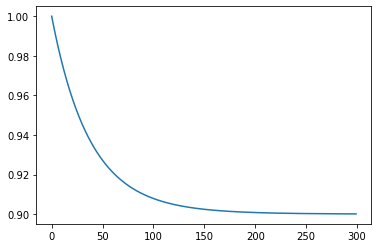

x_train -> (50000, 3072)
train_acc =  0.9
x_test -> (10000, 3072)
train_acc =  0.9


In [4]:
# Printing accuracies and displaying w as images
plt.plot(loss_history)

plt.show()

x_t=x_train
print('x_train ->' , x_t.shape)
h=1.0/(1.0 +np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

train_acc= 1.0-(1/Ntr)*(np.abs(np.argmax(y_train, axis=1)==np.argmax(y_pred, axis=1))).sum()
print('train_acc = ', train_acc)

x_t=x_test
print('x_test ->' , x_t.shape)
h=1.0/(1.0 +np.exp(-(x_t.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

test_acc= 1.0-(1/Nte)*(np.abs(np.argmax(y_test, axis=1)==np.argmax(y_pred, axis=1))).sum()
print('train_acc = ', test_acc)